In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D


from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter

plt.style.use("/Users/linsi/Documents/stanford/pythonstyle/evanstyle.mplstyle")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors[1] = 'darkgreen'

#import the folder that has the analysis level class
sys.path.append("/Users/linsi/Documents/stanford/HV/ad2-data-processing/CombinedData/")
sys.path.append("/Users/linsi/Documents/stanford/HV/ad2-data-processing/AnalysisTools/")
import Dataset
import AnalysisTools

In [2]:
topdirs = {5:"/Users/linsi/Documents/stanford/HV/data/Run5/", 6:"/Users/linsi/Documents/stanford/HV/data/Run6/", 7:"/Users/linsi/Documents/stanford/HV/data/Run7/", 8:"/Users/linsi/Documents/stanford/HV/data/Run8/", 9:"/Users/linsi/Documents/stanford/HV/data/Run9/"}
configs = {5:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run5_config.yaml", 6:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run6_config.yaml", 7:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run7_config.yaml", 8:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run8_config.yaml", 9:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run9_config.yaml"}
titles = {5:"SS uncoated", 6:"Refill of SS uncoated", 7:"MgF2 (50nm)", 8:"Pt (50nm)", 9:"MgF2 (20nm)"}
red_file_name = "combined_reduced.p"
#analysis tools objects, unloaded data
anas = {}
for n in topdirs:
    if(n == 6):continue
    anas[n] = AnalysisTools.AnalysisTools(topdirs[n]+red_file_name, configs[n], title=titles[n], ramp_topdir=topdirs[n])

/Users/linsi/Documents/stanford/HV/ad2-data-processing/AnalysisTools/AnalysisTools.py:127: UserWarning: genfromtxt: Empty input file: "/Users/linsi/Documents/stanford/HV/data/Run8/ds03/g_events.txt"
  d = np.genfromtxt(os.path.join(root, self.config["g_events_name"]), delimiter=',', dtype=float)


In [3]:
#load data into mem if you want
for n, ana in anas.items():
    if(n == 6): continue
    ana.load_dataframe()

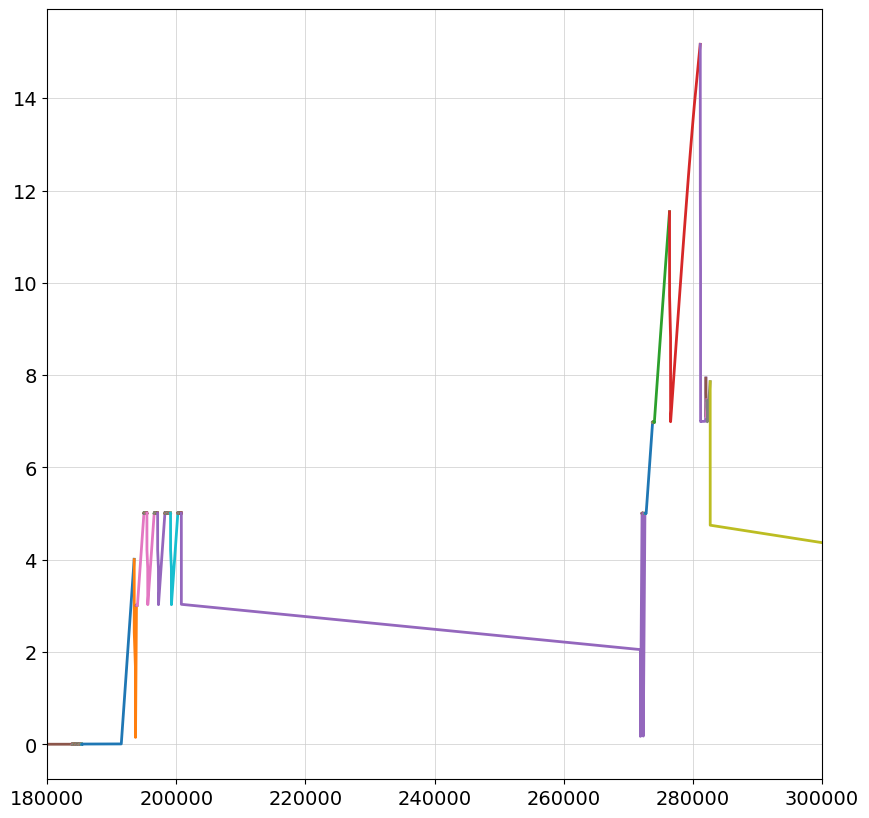

In [8]:
ana = anas[7]

fig, ax = plt.subplots()
t0 = np.min(ana.ramp_data["t"])
for ramp in ana.ramps:
    v = ramp["v"]
    ts = np.array(ramp["t"]) - t0
    ax.plot(ts, v)

for top in ana.flat_tops:
    v = top["v"]
    ts = np.array(top["t"]) - t0
    ax.plot(ts, v, 'k', linewidth=3)
    
ax.set_xlim([180000, 300000])
plt.show()
    

In [11]:
ana.df["ch0 nanoseconds"]

0             785831376.0
1             937445496.0
2             227123016.0
3             371502152.0
4        659025320.000001
               ...       
74448                None
74449                None
74450                None
74451                None
74452                None
Name: ch0 nanoseconds, Length: 74453, dtype: object